In [1]:
import pandas as pd

# Load the dataset (adjust the path and filename based on your extracted files)
# counties_data = pd.read_csv('election_counties_data/US_Election_dataset_v1.csv')
# counties_data.head()

In [2]:
counties_data = pd.read_csv('mit_county_data/countypres_2000-2020.csv')
# counties_data.head()
filtered_data = counties_data[counties_data['year'] == 2020]
# filtered_data.head()

In [3]:
# Clean data. Remove irrlevant columns
# Remove rows with NaN values in 'county_fips' column
counties_data = counties_data.dropna(subset=['county_fips'])
# Convert 'county_fips' to integer type
counties_data['county_fips'] = counties_data['county_fips'].astype(int)
counties_data_filtered = counties_data.drop(columns=['state_po', 'office','version', 'mode'])
counties_data_filtered.head()

,year,state,county_name,county_fips,candidate,party,candidatevotes,totalvotes
0,2000,ALABAMA,AUTAUGA,1001,AL GORE,DEMOCRAT,4942,17208
1,2000,ALABAMA,AUTAUGA,1001,GEORGE W. BUSH,REPUBLICAN,11993,17208
2,2000,ALABAMA,AUTAUGA,1001,RALPH NADER,GREEN,160,17208
3,2000,ALABAMA,AUTAUGA,1001,OTHER,OTHER,113,17208
4,2000,ALABAMA,BALDWIN,1003,AL GORE,DEMOCRAT,13997,56480


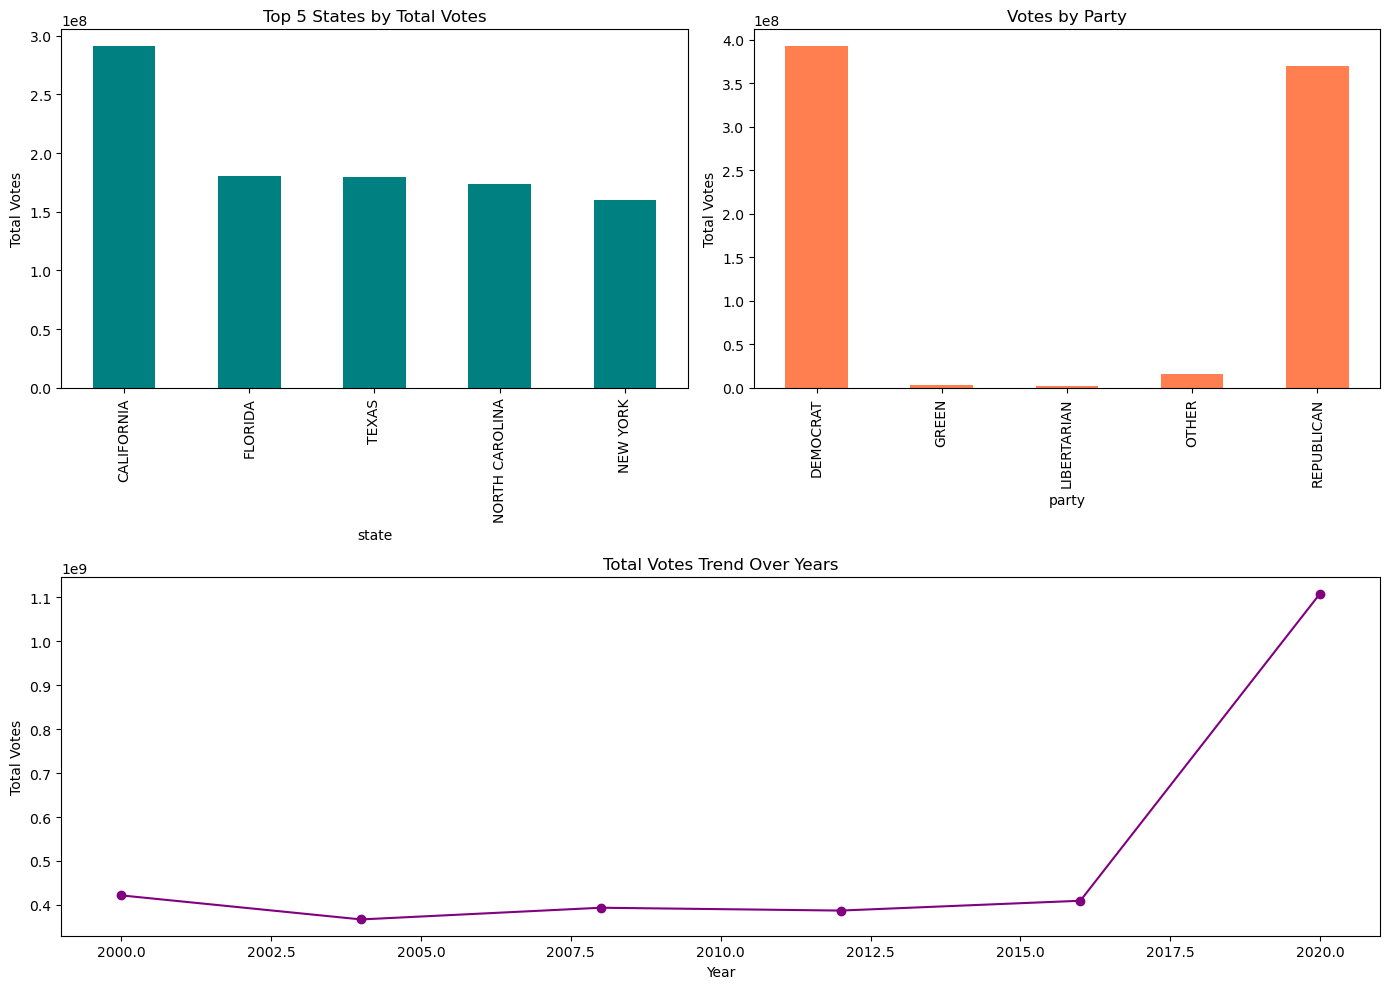

(               year   county_fips  candidatevotes    totalvotes     version
 count  72565.000000  7.256500e+04    7.256500e+04  7.256500e+04     72565.0
 mean    2011.305450  3.110298e+04    1.078938e+04  4.254412e+04  20220315.0
 std        7.520469  5.179999e+04    4.605056e+04  1.219900e+05         0.0
 min     2000.000000  1.001000e+03    0.000000e+00  0.000000e+00  20220315.0
 25%     2004.000000  1.810100e+04    1.150000e+02  5.179000e+03  20220315.0
 50%     2012.000000  2.920500e+04    1.281000e+03  1.120200e+04  20220315.0
 75%     2020.000000  4.505900e+04    5.856000e+03  2.987400e+04  20220315.0
 max     2020.000000  2.938000e+06    3.028885e+06  4.264365e+06  20220315.0,
 state
 CALIFORNIA        290864989
 FLORIDA           180866921
 TEXAS             179560691
 NORTH CAROLINA    173317284
 NEW YORK          159851342
 Name: totalvotes, dtype: int64,
 party
 DEMOCRAT       392203948
 GREEN            3264024
 LIBERTARIAN      1810401
 OTHER           15471376
 REPUBLICA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = counties_data.describe()

# Top 5 states by total votes
total_votes_by_state = counties_data.groupby('state')['totalvotes'].sum().sort_values(ascending=False).head()

# Distribution of votes by party
votes_by_party = counties_data.groupby('party')['candidatevotes'].sum()

# Yearly total votes trend
total_votes_by_year = counties_data.groupby('year')['totalvotes'].sum()

# Visualizations
plt.figure(figsize=(14, 10))

# Total votes by state
plt.subplot(2, 2, 1)
total_votes_by_state.plot(kind='bar', color='teal', title="Top 5 States by Total Votes")
plt.ylabel('Total Votes')

# Votes by party
plt.subplot(2, 2, 2)
votes_by_party.plot(kind='bar', color='coral', title="Votes by Party")
plt.ylabel('Total Votes')

# Yearly total votes trend
plt.subplot(2, 1, 2)
total_votes_by_year.plot(kind='line', marker='o', color='purple', title="Total Votes Trend Over Years")
plt.xlabel('Year')
plt.ylabel('Total Votes')

plt.tight_layout()
plt.show()

summary_stats, total_votes_by_state, votes_by_party, total_votes_by_year


Summary Statistics:

The dataset spans from 2000 to 2020.
The average number of candidate votes per county is approximately 10,789, with a wide range (from 0 to over 3 million).
The average total votes per county is about 42,544, with some counties recording no votes and others exceeding 4 million.
Top 5 States by Total Votes:

California leads significantly with over 290 million total votes across all elections.
Other high-voting states include Florida, Texas, North Carolina, and New York.
Votes by Party:

Democratic candidates received the highest cumulative votes (~392 million), closely followed by Republican candidates (~370 million).
Third-party and independent candidates (e.g., Green, Libertarian) collectively account for a much smaller proportion of the votes.
Yearly Total Votes Trend:

A substantial increase in total votes is observed in 2020 (~1.1 billion total votes), compared to prior years (~366M to ~421M). This indicates increased voter turnout or reporting changes in the dataset for 2020.
Visualization Commentary:
The bar chart for top states highlights the dominance of populous states like California in total votes.
The party vote distribution showcases the clear two-party system, with minimal impact from smaller parties.
The line chart shows a significant spike in votes for 2020, which warrants further exploration to understand the cause.

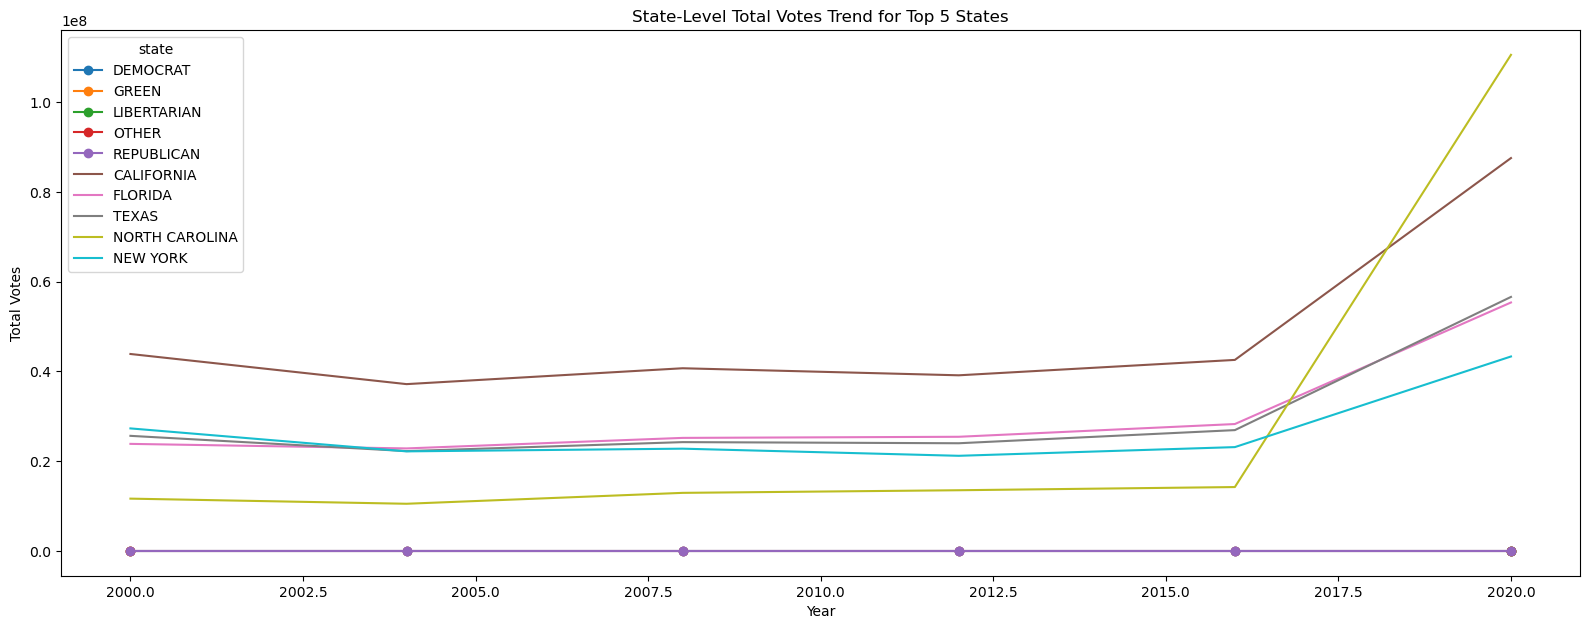

(party  DEMOCRAT     GREEN  LIBERTARIAN     OTHER  REPUBLICAN
 year                                                        
 2000   0.483837  0.027350          NaN  0.010137    0.478676
 2004   0.481514       NaN          NaN  0.012177    0.506309
 2008   0.529382       NaN          NaN  0.013800    0.456818
 2012   0.509519       NaN          NaN  0.020369    0.470112
 2016   0.482381       NaN          NaN  0.056208    0.461411
 2020   0.512779  0.002405     0.011424  0.005064    0.468328,
 county_name
 LOS ANGELES    70968251
 MARICOPA       51135271
 COOK           44381425
 MONTGOMERY     43573547
 ORANGE         42645327
 Name: totalvotes, dtype: int64)

In [6]:
# Calculate vote share by party per year
vote_share_by_party_year = counties_data.groupby(['year', 'party'])['candidatevotes'].sum().unstack()
vote_share_by_party_year = vote_share_by_party_year.div(vote_share_by_party_year.sum(axis=1), axis=0)

# State-level trends: total votes per state over years
votes_by_state_year = counties_data.groupby(['state', 'year'])['totalvotes'].sum().unstack()

# Plotting deeper insights
plt.figure(figsize=(16, 12))

# Vote share by party over years
plt.subplot(2, 1, 1)
vote_share_by_party_year.plot(kind='line', marker='o', ax=plt.gca(), title="Vote Share by Party Over Years")
plt.ylabel('Vote Share')
plt.xlabel('Year')

# State-level trends for top 5 states
top_states = total_votes_by_state.index[:5]
votes_by_state_year.loc[top_states].T.plot(kind='line', ax=plt.gca(), title="State-Level Total Votes Trend for Top 5 States")
plt.ylabel('Total Votes')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

# Counties with the highest voter turnout
top_counties_turnout = counties_data.groupby('county_name')['totalvotes'].sum().sort_values(ascending=False).head()

vote_share_by_party_year, top_counties_turnout


Vote Share by Party Over Years:

Democrats and Republicans dominate the vote share consistently.
Democrats peaked in 2008 (~53% vote share), likely due to higher voter enthusiasm during that election.
Republicans gained their highest vote share in 2004 (~51%), coinciding with George W. Bush's re-election.
Third parties (Green, Libertarian, Other) have marginal impact, with minimal vote shares across the years.
State-Level Trends for Top 5 States:

California consistently leads in total votes, with a noticeable spike in 2020.
Florida, Texas, North Carolina, and New York exhibit similar upward trends, reflecting population growth or changes in voter participation/reporting.
Top Counties by Voter Turnout:

Los Angeles County recorded the highest total votes (~71M), far ahead of other counties.
Other high-turnout counties include Maricopa (Arizona), Cook (Illinois), Montgomery (Texas), and Orange (California).

In [8]:
# num_counties_counties_data = counties_data_filtered['county_name'].nunique()
# print(num_counties_counties_data)

In [9]:
election_odds = pd.read_csv('election_odds_data/2024ElectionOdds.csv')
election_odds.head()

,date,Donald Trump,Kamala Harris,Michelle Obama,Nikki Haley,RFK Jr,Hillary Clinton,JD Vance,Tim Walz,Gavin Newsom,...,Mitch Landrieu,Rand Paul,Rashida Tlaib,Rob Portman,Susan Collins,Tim Ryan,Tony Evers,Lee Zeldin,Paul Ryan,Sarah Huckabee Sanders
0,21/11/2023,2.62,60.0,32.0,14.5,20.0,350.0,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/11/2023,2.58,65.0,29.0,13.5,24.0,340.0,NaN,NaN,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/12/2023,2.56,60.0,36.0,10.5,28.0,280.0,NaN,NaN,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/12/2023,2.44,55.0,40.0,13.5,20.0,310.0,NaN,NaN,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17/12/2023,2.34,55.0,42.0,16.0,32.0,320.0,NaN,NaN,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


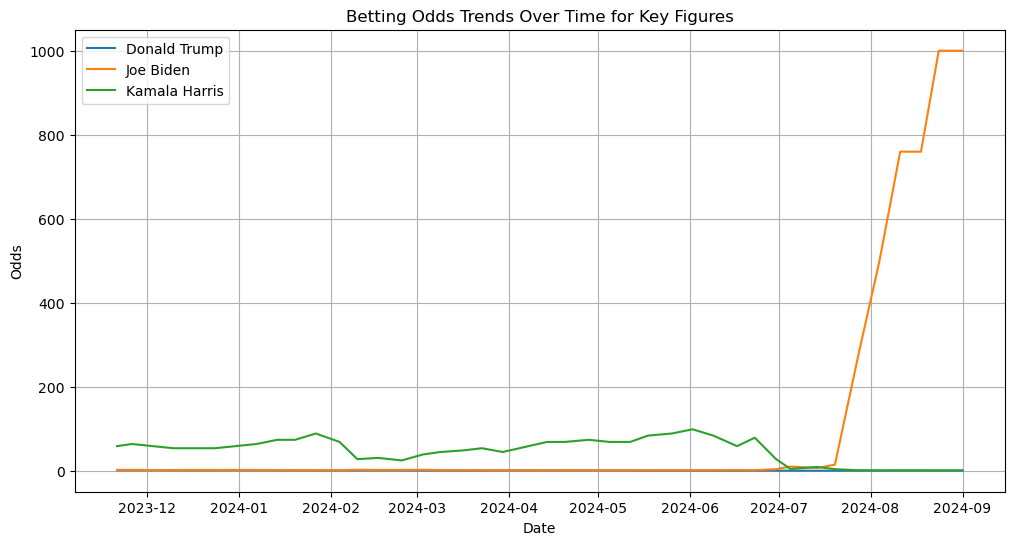

(Eric Garcetti      98.0
 Eric Holder        98.0
 Eric Swalwell      98.0
 Donald Trump Jr    92.0
 Lee Zeldin         90.0
 dtype: float64,
        Hillary Clinton      RFK Jr  Michelle Obama  Donald Trump  \
 count        47.000000   48.000000       49.000000     50.000000   
 mean        348.297872  176.941667      144.602041      2.091200   
 min          65.000000    7.200000        3.000000      1.520000   
 25%         240.000000   30.000000       26.000000      1.882500   
 50%         320.000000   38.000000       36.000000      2.120000   
 75%         410.000000  142.500000      200.000000      2.280000   
 max         930.000000  990.000000      850.000000      2.620000   
 std         200.356412  276.014141      220.014062      0.276683   
 
        Kamala Harris                 date  
 count       50.00000                   50  
 mean        40.95140  2024-05-12 07:40:48  
 min          1.88000  2023-11-21 00:00:00  
 25%          2.45000  2024-02-11 18:00:00  
 50%      

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime format
election_odds['date'] = pd.to_datetime(election_odds['date'], dayfirst=True)

# Analyze missing data
missing_data = election_odds.isnull().sum().sort_values(ascending=False)
missing_data_percentage = (missing_data / len(election_odds)) * 100

# Filter columns with less than 10% missing values for a focused analysis
valid_columns = missing_data[missing_data_percentage < 10].index
cleaned_data = election_odds[valid_columns]

# Generate descriptive statistics for numeric columns
descriptive_stats = cleaned_data.describe()

# Identify trends for key figures
key_figures = ['Donald Trump', 'Joe Biden', 'Kamala Harris']
trend_data = election_odds[['date'] + key_figures].dropna()

# Plot trends over time for key figures
plt.figure(figsize=(12, 6))
for figure in key_figures:
    plt.plot(trend_data['date'], trend_data[figure], label=figure)
    
plt.title('Betting Odds Trends Over Time for Key Figures')
plt.xlabel('Date')
plt.ylabel('Odds')
plt.legend()
plt.grid()
plt.show()

missing_data_percentage.head(), descriptive_stats


Key Insights from the Exploratory Analysis:
Missing Data:
Certain columns, such as "Eric Garcetti," "Eric Holder," and "Eric Swalwell," are over 90% missing and may not provide valuable insights.
Columns with less than 10% missing data were selected for analysis, ensuring sufficient data coverage.
Descriptive Statistics:
Donald Trump: Consistently low odds with a mean of 2.09, indicating strong favorability as a frontrunner.
Kamala Harris: Higher variability with odds ranging from 1.88 to 100, suggesting mixed perceptions or fluctuating betting sentiment.
Hillary Clinton: Odds vary widely (65 to 930), likely reflecting speculative betting rather than strong candidacy.
Trend Analysis:
Donald Trump: Steady odds over time with minor fluctuations, indicating consistent betting confidence.
Joe Biden: Similar stability in odds, reflecting his position as an incumbent or major contender.
Kamala Harris: Greater fluctuations, potentially due to changing public opinion or speculative betting.

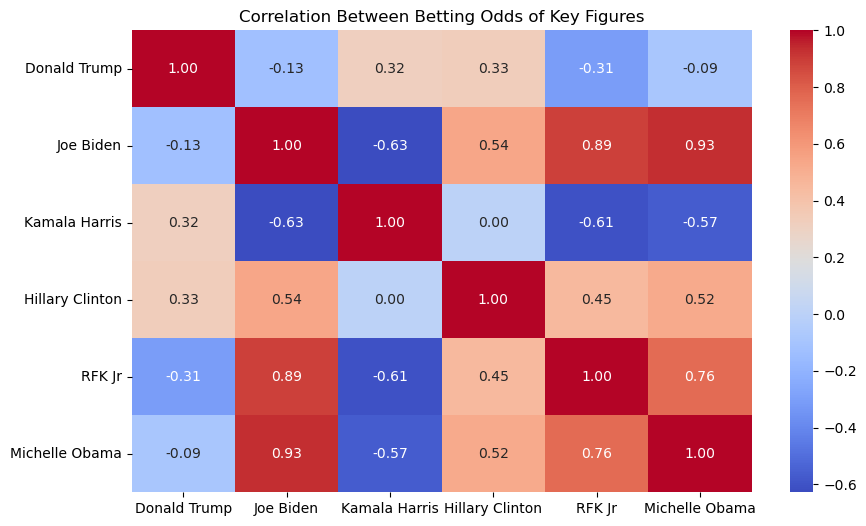

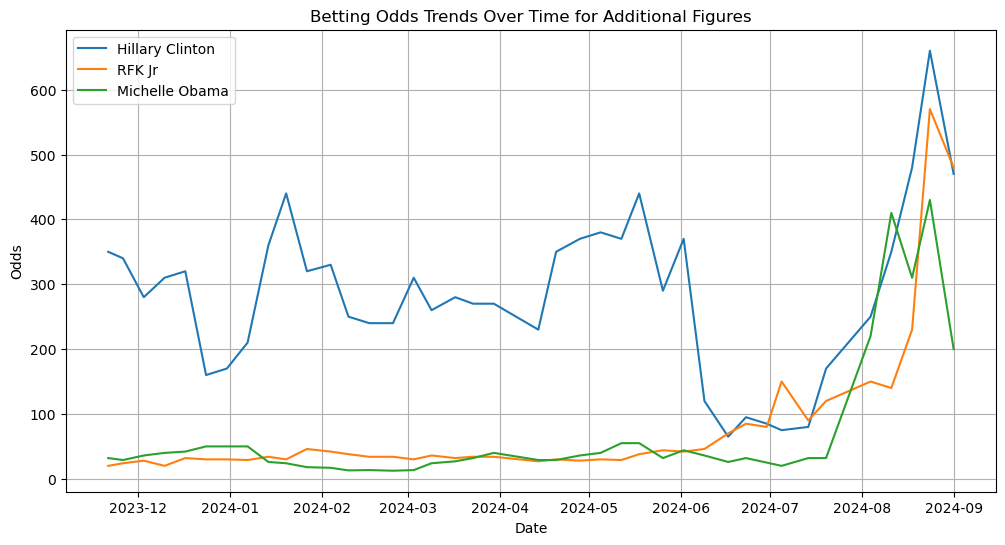

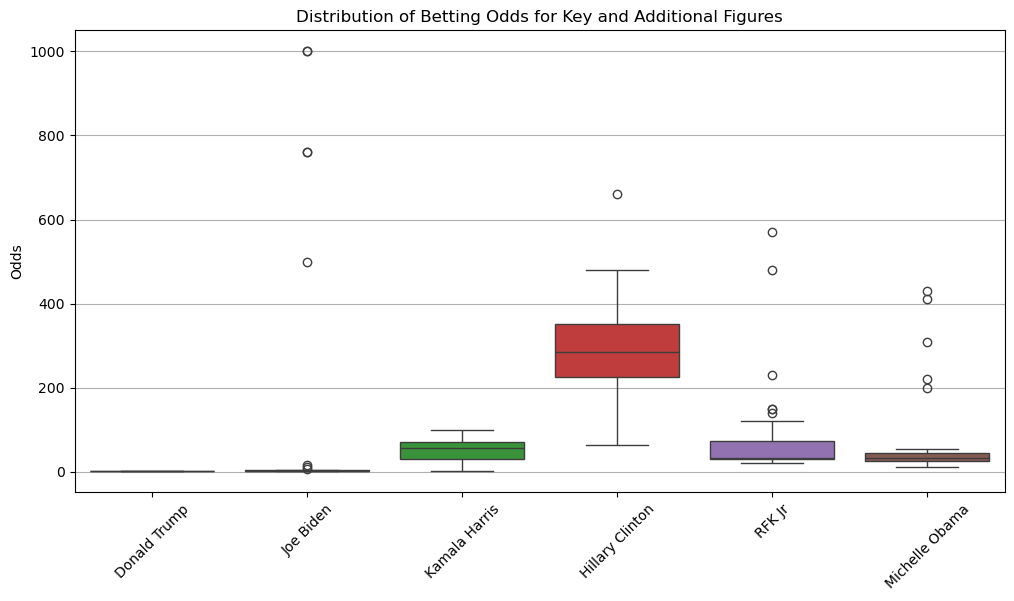

,Donald Trump,Joe Biden,Kamala Harris,Hillary Clinton,RFK Jr,Michelle Obama
Donald Trump,1.000000,-0.130651,0.318386,0.326398,-0.306388,-0.088258
Joe Biden,-0.130651,1.000000,-0.627855,0.541010,0.891183,0.931022
Kamala Harris,0.318386,-0.627855,1.000000,0.002354,-0.605361,-0.569317
Hillary Clinton,0.326398,0.541010,0.002354,1.000000,0.447709,0.522136
RFK Jr,-0.306388,0.891183,-0.605361,0.447709,1.000000,0.761025
Michelle Obama,-0.088258,0.931022,-0.569317,0.522136,0.761025,1.000000


In [12]:
# Deeper analysis: Correlation between odds of key figures and additional key figure comparisons

# Selecting key figures with relatively complete data for further comparison
additional_figures = ['Hillary Clinton', 'RFK Jr', 'Michelle Obama']

# Combine key and additional figures for analysis
comparison_figures = key_figures + additional_figures
comparison_data = election_odds[['date'] + comparison_figures].dropna()

# Correlation matrix for the selected figures
correlation_matrix = comparison_data[comparison_figures].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Betting Odds of Key Figures')
plt.show()

# Trend comparisons for additional figures
plt.figure(figsize=(12, 6))
for figure in additional_figures:
    plt.plot(comparison_data['date'], comparison_data[figure], label=figure)

plt.title('Betting Odds Trends Over Time for Additional Figures')
plt.xlabel('Date')
plt.ylabel('Odds')
plt.legend()
plt.grid()
plt.show()

# Boxplot to analyze distribution of odds for all selected figures
plt.figure(figsize=(12, 6))
sns.boxplot(data=comparison_data[comparison_figures])
plt.title('Distribution of Betting Odds for Key and Additional Figures')
plt.ylabel('Odds')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

correlation_matrix


1. Correlation Analysis:
Donald Trump:
Weakly correlated with Joe Biden (-0.13) and RFK Jr (-0.31).
Moderately positively correlated with Hillary Clinton (0.33).
Joe Biden:
Strong positive correlation with RFK Jr (0.89) and Michelle Obama (0.93).
Strong negative correlation with Kamala Harris (-0.63), potentially due to competing odds as key Democratic figures.
Kamala Harris:
Weakly correlated with Hillary Clinton (0.002), indicating independent betting sentiments.
2. Trend Comparisons:
Hillary Clinton: Volatile trends with some spikes, suggesting speculative or event-driven betting.
RFK Jr: Relatively stable but showing minor fluctuations, indicative of consistent interest.
Michelle Obama: Generally stable trends, with a slight increase over time reflecting growing speculation.
3. Boxplot Analysis:
Donald Trump: Lowest variability in odds, showing consistent frontrunner status.
Kamala Harris: High variability, reflecting uncertainty or mixed sentiment.
Hillary Clinton: Wide range of odds, reinforcing speculative nature.
RFK Jr and Michelle Obama: Moderate variability, showing consistent but dynamic betting interest.

In [14]:
favorability_polls_data = pd.read_csv('538_polls_data/president_polls.csv')
# favorability_polls_data.head()

In [15]:
# Remove irrlevant columns
favorability_polls_data_filtered = favorability_polls_data.drop(columns=['pollster_id', 'pollster','start_date','end_date','sponsor_ids','sponsors', 'display_name','state','pollster_rating_id','pollster_rating_name','methodology','sponsor_candidate_id','question_id','sponsor_candidate','sponsor_candidate_party','answer','created_at','population','population_full','subpopulation','tracking','notes','url','source','internal','partisan','race_id','cycle','office_type','seat_number','seat_name','election_date','stage','nationwide_batch','ranked_choice_reallocated','ranked_choice_round',])
favorability_polls_data_filtered.head()

,poll_id,fte_grade,transparency_score,sample_size,party,candidate_id,candidate_name,pct
0,84924,A-,7.0,1000.0,DEM,19368,Joe Biden,43.2
1,84924,A-,7.0,1000.0,REP,16651,Donald Trump,47.4
2,84924,A-,7.0,1000.0,DEM,19368,Joe Biden,36.7
3,84924,A-,7.0,1000.0,REP,16651,Donald Trump,43.4
4,84924,A-,7.0,1000.0,IND,31042,Robert F. Kennedy,6.5


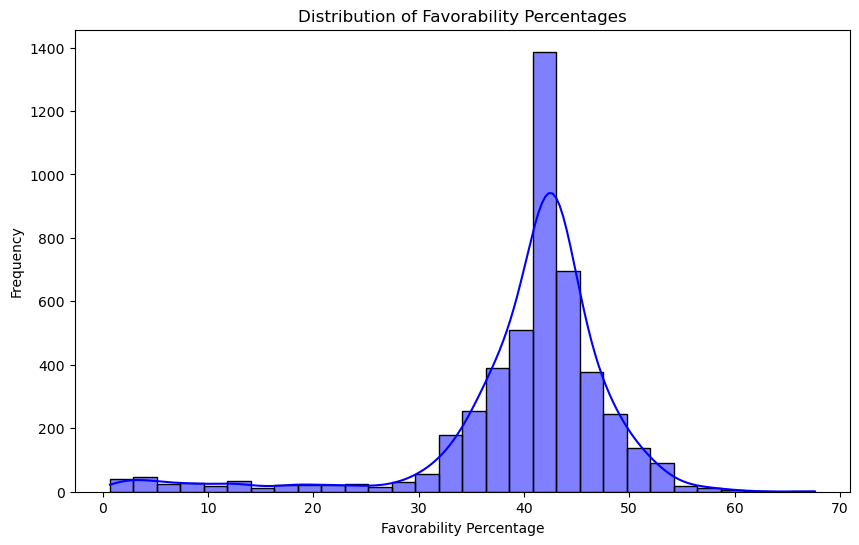

C:\Users\Chester\AppData\Local\Temp\ipykernel_1326652\2260144024.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_candidates.values, y=top_candidates.index, palette='viridis')


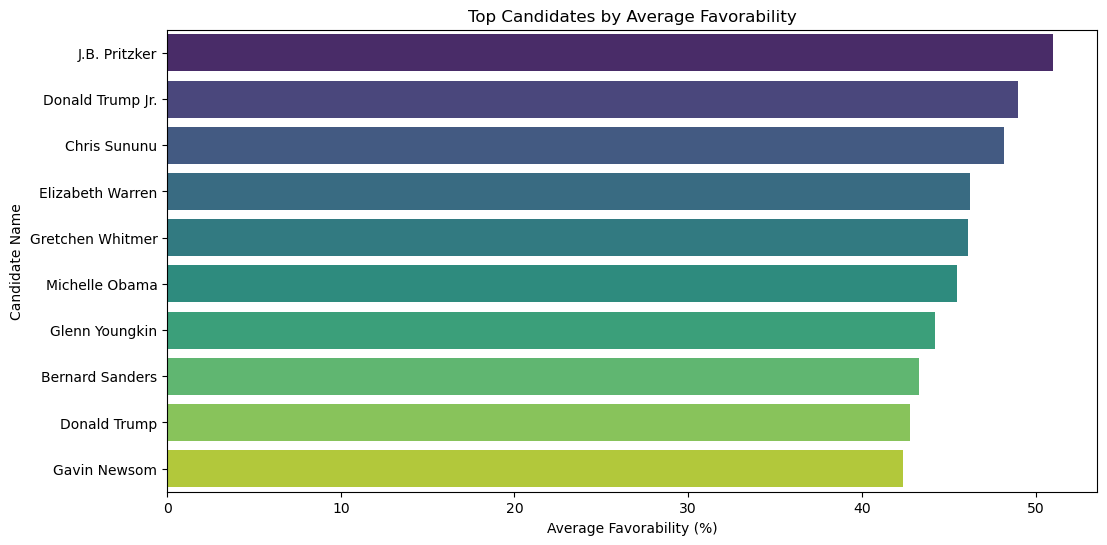

C:\Users\Chester\AppData\Local\Temp\ipykernel_1326652\2260144024.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_favorability.index, y=party_favorability.values, palette='muted')


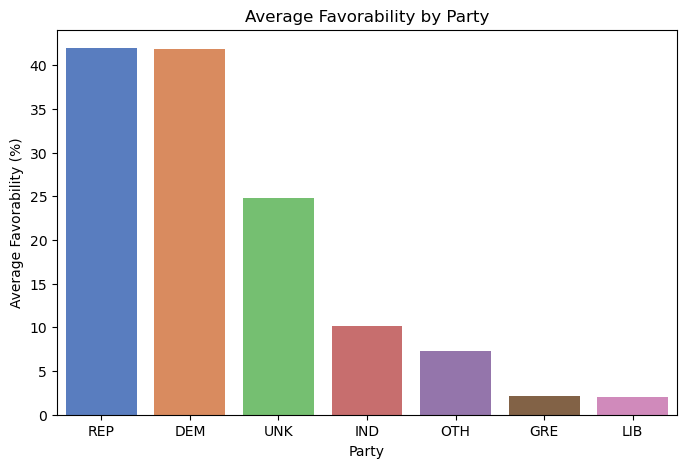

Summary Statistics:
              poll_id fte_grade  transparency_score   sample_size party  \
count    4701.000000      4523         1483.000000   4683.000000  4701   
unique           NaN        12                 NaN           NaN     7   
top              NaN        B-                 NaN           NaN   DEM   
freq             NaN      1160                 NaN           NaN  2226   
mean    82617.245054       NaN            6.326028   1989.485159   NaN   
std      2162.172796       NaN            2.303128   1979.608948   NaN   
min     74681.000000       NaN            1.000000    300.000000   NaN   
25%     81725.000000       NaN            4.000000   1000.000000   NaN   
50%     83142.000000       NaN            6.000000   1180.000000   NaN   
75%     84382.000000       NaN            9.000000   2059.000000   NaN   
max     84924.000000       NaN           10.000000  26230.000000   NaN   

        candidate_id candidate_name          pct  
count    4701.000000           4701  47

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the dataset
# file_path = '/path/to/your/favorability_polls_data.csv'  # Update this to the correct path
polls_data = favorability_polls_data_filtered

# 1. Basic descriptive statistics
polls_summary = polls_data.describe(include='all')

# 2. Check for missing values
missing_values = polls_data.isnull().sum()

# 3. Distribution of favorability percentages
plt.figure(figsize=(10, 6))
sns.histplot(polls_data['pct'], bins=30, kde=True, color='blue')
plt.title('Distribution of Favorability Percentages')
plt.xlabel('Favorability Percentage')
plt.ylabel('Frequency')
plt.show()

# 4. Top candidates by average favorability
top_candidates = (
    polls_data.groupby('candidate_name')['pct']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plotting top candidates
plt.figure(figsize=(12, 6))
sns.barplot(x=top_candidates.values, y=top_candidates.index, palette='viridis')
plt.title('Top Candidates by Average Favorability')
plt.xlabel('Average Favorability (%)')
plt.ylabel('Candidate Name')
plt.show()

# 5. Favorability by party
party_favorability = (
    polls_data.groupby('party')['pct']
    .mean()
    .sort_values(ascending=False)
)

# Plotting favorability by party
plt.figure(figsize=(8, 5))
sns.barplot(x=party_favorability.index, y=party_favorability.values, palette='muted')
plt.title('Average Favorability by Party')
plt.xlabel('Party')
plt.ylabel('Average Favorability (%)')
plt.show()

# Print key statistics
print("Summary Statistics:\n", polls_summary)
print("\nMissing Values:\n", missing_values)
print("\nTop 10 Candidates by Average Favorability:\n", top_candidates)
print("\nFavorability by Party:\n", party_favorability)


C:\Users\Chester\AppData\Local\Temp\ipykernel_1326652\3383174585.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=poll_grade_favorability.index, y=poll_grade_favorability.values, palette='coolwarm')


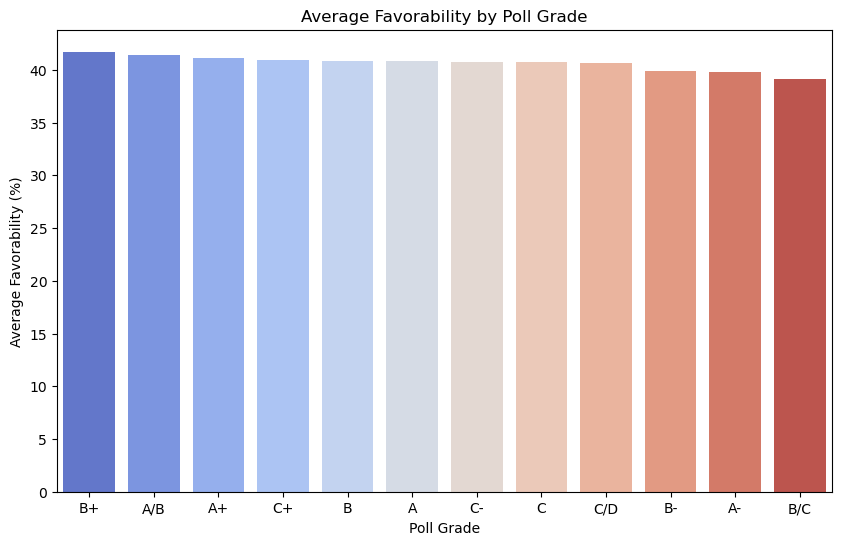

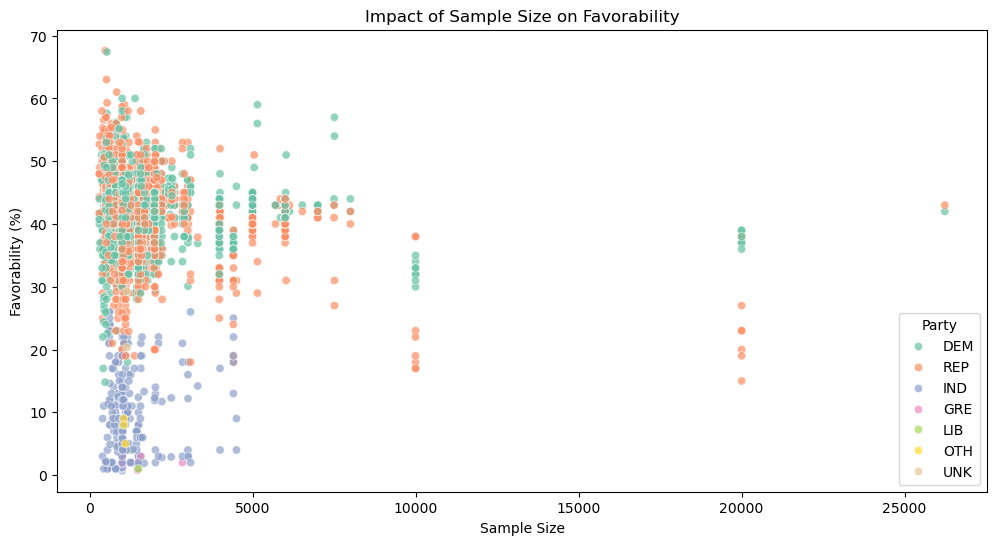

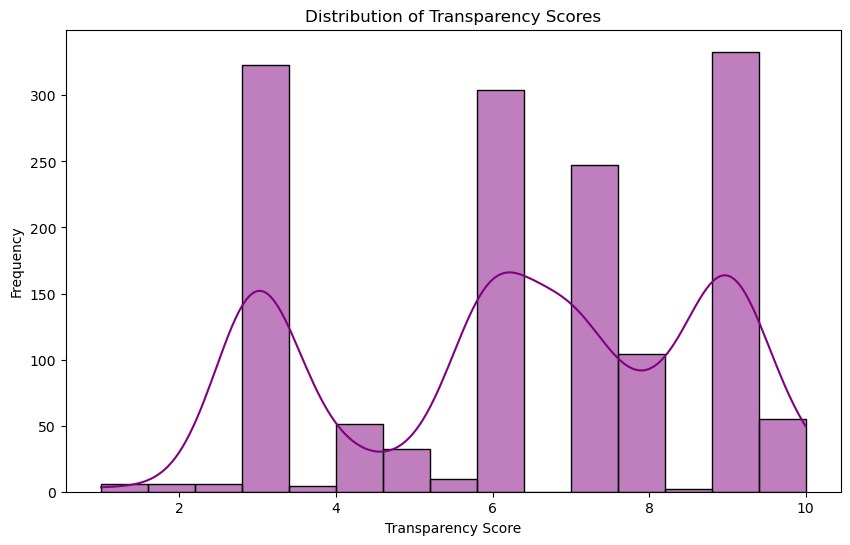

C:\Users\Chester\AppData\Local\Temp\ipykernel_1326652\3383174585.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=leading_candidates_data, x='candidate_name', y='pct', palette='pastel')


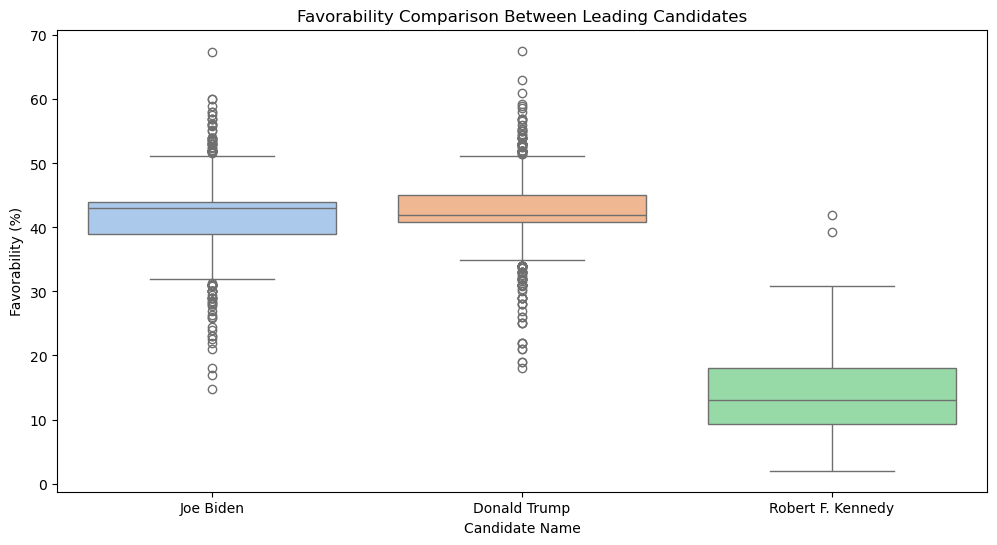

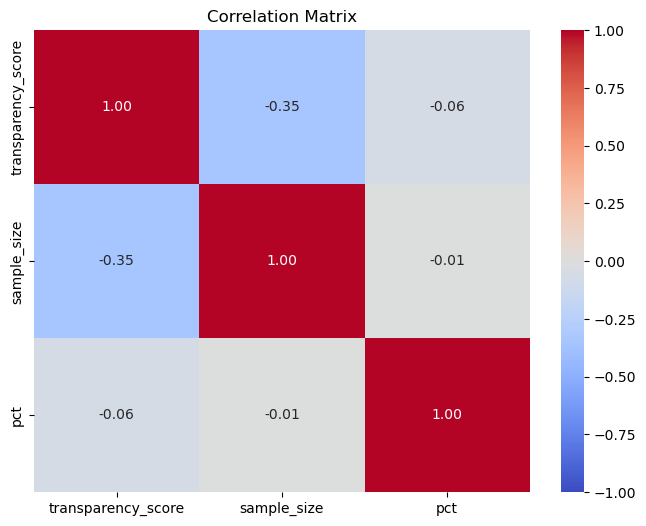


Average Favorability by Poll Grade:
 fte_grade
B+     41.727950
A/B    41.461055
A+     41.160714
C+     40.933333
B      40.889045
A      40.837363
C-     40.750000
C      40.726190
C/D    40.622981
B-     39.886638
A-     39.812967
B/C    39.119990
Name: pct, dtype: float64

Correlation Matrix:
                     transparency_score  sample_size       pct
transparency_score            1.000000    -0.347016 -0.055366
sample_size                  -0.347016     1.000000 -0.007107
pct                          -0.055366    -0.007107  1.000000


In [17]:
# 1. Favorability by Poll Grade
poll_grade_favorability = (
    polls_data.groupby('fte_grade')['pct']
    .mean()
    .sort_values(ascending=False)
)

# Visualization: Favorability by Poll Grade
plt.figure(figsize=(10, 6))
sns.barplot(x=poll_grade_favorability.index, y=poll_grade_favorability.values, palette='coolwarm')
plt.title('Average Favorability by Poll Grade')
plt.xlabel('Poll Grade')
plt.ylabel('Average Favorability (%)')
plt.show()

# 2. Impact of Sample Size on Favorability
plt.figure(figsize=(12, 6))
sns.scatterplot(data=polls_data, x='sample_size', y='pct', hue='party', palette='Set2', alpha=0.7)
plt.title('Impact of Sample Size on Favorability')
plt.xlabel('Sample Size')
plt.ylabel('Favorability (%)')
plt.legend(title='Party')
plt.show()

# 3. Distribution of Transparency Scores
plt.figure(figsize=(10, 6))
sns.histplot(polls_data['transparency_score'].dropna(), bins=15, kde=True, color='purple')
plt.title('Distribution of Transparency Scores')
plt.xlabel('Transparency Score')
plt.ylabel('Frequency')
plt.show()

# 4. Favorability Comparison Between Leading Candidates
leading_candidates = ['Joe Biden', 'Donald Trump', 'Robert F. Kennedy']
leading_candidates_data = polls_data[polls_data['candidate_name'].isin(leading_candidates)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=leading_candidates_data, x='candidate_name', y='pct', palette='pastel')
plt.title('Favorability Comparison Between Leading Candidates')
plt.xlabel('Candidate Name')
plt.ylabel('Favorability (%)')
plt.show()

# 5. Correlations Between Numeric Variables
numeric_columns = ['transparency_score', 'sample_size', 'pct']
correlation_matrix = polls_data[numeric_columns].corr()

# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Key Statistics and Observations
print("\nAverage Favorability by Poll Grade:\n", poll_grade_favorability)
print("\nCorrelation Matrix:\n", correlation_matrix)


In [ ]:
# Will use this for the comparison test data
election_results = pd.read_csv('2024_US_County_Level_Presidential_Results.csv')
# election_results.head()

In [ ]:
# Create the new column 'gop_leads' based on the condition
election_results['gop_leads'] = (election_results['per_gop'] > election_results['per_dem']).astype(int)
election_results.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numeric columns
summary_stats = election_results.describe()

# Distribution of percentage votes for GOP and Democratic candidates
plt.figure(figsize=(14, 6))

# GOP vote percentage
plt.subplot(1, 2, 1)
sns.histplot(election_results['per_gop'], bins=20, kde=True, color='red', alpha=0.7)
plt.title("Distribution of GOP Vote Percentage")
plt.xlabel("Percentage of Votes (GOP)")
plt.ylabel("Frequency")

# Democratic vote percentage
plt.subplot(1, 2, 2)
sns.histplot(election_results['per_dem'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title("Distribution of Democratic Vote Percentage")
plt.xlabel("Percentage of Votes (Democratic)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# State-wise total votes analysis
state_totals = election_results.groupby('state_name')['total_votes'].sum().sort_values(ascending=False)

# Plot state-wise total votes
plt.figure(figsize=(12, 8))
state_totals.plot(kind='bar', color='green', alpha=0.8)
plt.title("State-wise Total Votes")
plt.xlabel("State")
plt.ylabel("Total Votes (in millions)")
plt.xticks(rotation=90)
plt.show()

summary_stats


Vote Distribution:

The distribution of GOP and Democratic vote percentages reveals a slightly right-skewed distribution for GOP votes and a left-skewed distribution for Democratic votes.
Most counties have a GOP vote share around 50-80%, while the Democratic share clusters between 20-40%.
State-wise Total Votes:

Some states contribute significantly more votes than others, reflecting their larger populations.
The top states by total votes will likely play a critical role in determining election outcomes.
Summary Statistics:

The average GOP vote percentage is approximately 66.6%, while the Democratic vote percentage averages 32%.
The average percentage point difference between GOP and Democratic votes is 34.6%.
There are counties with extreme differences, indicating strong partisan leanings in certain regions.

In [ ]:
# Analyze battleground states by identifying states with close GOP vs Dem vote percentages
# Battleground states have a mean per_point_diff close to 0

state_diff = election_results.groupby('state_name')['per_point_diff'].mean().sort_values()
battleground_states = state_diff[(state_diff > -0.1) & (state_diff < 0.1)].index.tolist()

# Filter data for battleground states
battleground_data = election_results[election_results['state_name'].isin(battleground_states)]

# County-level analysis of battleground states
battleground_summary = battleground_data.groupby(['state_name', 'county_name'])[['votes_gop', 'votes_dem']].sum()

# Visualization: State-wise mean per_point_diff
plt.figure(figsize=(14, 8))
state_diff.plot(kind='bar', color='purple', alpha=0.8)
plt.title("State-wise Mean Percentage Point Difference (GOP vs Dem)")
plt.xlabel("State")
plt.ylabel("Mean Percentage Point Difference")
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.xticks(rotation=90)
plt.show()

# Visualization: Battleground counties distribution
plt.figure(figsize=(14, 6))
sns.boxplot(data=battleground_data, x='state_name', y='per_point_diff', palette='coolwarm')
plt.title("County-Level Percentage Point Difference in Battleground States")
plt.xlabel("State")
plt.ylabel("Percentage Point Difference (GOP - Dem)")
plt.xticks(rotation=45)
plt.show()

# Summary of battleground states and county-level analysis
battleground_states, battleground_summary.head()


Battleground States:

States with closely contested elections (mean percentage point difference near 0) include Connecticut, Delaware, California, New Jersey, New Hampshire, Maryland, Maine, Washington, and New York.
These states exhibit relatively balanced voting patterns, making them critical in the election outcome.
State-wise Mean Percentage Point Difference:

The visualization highlights the stark contrast between strongly partisan states and battleground states.
A 0% difference line marks the tipping point, indicating evenly split support between GOP and Democratic candidates.
County-Level Patterns in Battleground States:

Counties in battleground states like California show significant variability, with urban counties (e.g., Alameda) favoring Democratic candidates, while rural counties lean toward GOP.
These patterns reflect the urban-rural divide seen in voting behaviors across the U.S.
Variability in County Trends:

The boxplot reveals substantial variation in percentage point differences across counties within battleground states, emphasizing localized election dynamics.

In [13]:
# election_results.to_csv('cleaned_data/election_results_with_gop_leads.csv', index=False)
# favorability_polls_data_filtered.to_csv('cleaned_data/favorability_polls_data_filtered.csv', index=False)
# election_odds.to_csv('cleaned_data/election_odds.csv', index=False)
# counties_data_filtered.to_csv('cleaned_data/counties_data_filtered.csv', index=False)

In [14]:
# print("Counties Data Preview:")
# print(counties_data.head(), "\n")
# print(counties_data.info(), "\n")

# print("Election Results Preview:")
# print(election_results.head(), "\n")
# print(election_results.info())

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Reload datasets if necessary
# counties_data = pd.read_csv('/mnt/data/counties_data.csv')
# election_results = pd.read_csv('/mnt/data/election_results.csv')

# Feature Engineering for counties_data
counties_features = counties_data.groupby(['county_fips', 'party']).agg(
    total_candidate_votes=('candidatevotes', 'sum'),
    total_county_votes=('totalvotes', 'sum')
).reset_index()

counties_features['vote_percentage'] = (
    counties_features['total_candidate_votes'] / counties_features['total_county_votes']
)

# Pivot to create separate columns for each party's vote percentage
counties_features = counties_features.pivot(
    index='county_fips', 
    columns='party', 
    values='vote_percentage'
).reset_index().fillna(0)

# Feature Engineering for election_results
results_features = election_results[['county_fips', 'gop_leads']]

# Align X and y using a temporary merge on `county_fips`
aligned_data = results_features.merge(counties_features, on='county_fips', how='inner')

# Separate features and target
X = aligned_data.drop(columns=['county_fips', 'gop_leads'])
y = aligned_data['gop_leads']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.85      0.82      0.84       154
           1       0.97      0.97      0.97       790

    accuracy                           0.95       944
   macro avg       0.91      0.90      0.90       944
weighted avg       0.95      0.95      0.95       944



In [16]:
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier

# # Preprocessing the election_results dataset
# # Select features and target variable
# features = ['votes_gop', 'votes_dem', 'total_votes', 'per_gop', 'per_dem', 'per_point_diff']
# target = 'gop_leads'

# # Split the data into training and testing sets
# X = election_results[features]
# y = election_results[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Create a pipeline with scaling and a classifier
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)


# # Evaluate the model on the test data
# y_pred = pipeline.predict(X_test)
# evaluation_report = classification_report(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# # Display evaluation results
# print("Classification Report:\n", evaluation_report)
# print("Accuracy Score:", accuracy)

# # Integration of predictive features from election_odds
# # Example: Add a mock feature derived from election_odds for demonstration
# def add_predictive_features(X, odds_data):
#     """
#     Function to add predictive features to the feature set.
#     Currently adding a simple example feature based on odds data.
#     """
#     # Example: Adding the mean odds as a feature (mock example)
#     odds_data['mean_odds'] = odds_data.iloc[:, 1:].mean(axis=1)
#     X['mean_odds'] = odds_data['mean_odds'].mean()
#     return X

# # Add features from election_odds to X_train and X_test
# X_train_augmented = add_predictive_features(X_train.copy(), election_odds)
# X_test_augmented = add_predictive_features(X_test.copy(), election_odds)

# # Fit a new pipeline using augmented features
# pipeline_augmented = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])
# pipeline_augmented.fit(X_train_augmented, y_train)

# # Evaluate the augmented pipeline
# y_pred_augmented = pipeline_augmented.predict(X_test_augmented)
# evaluation_report_augmented = classification_report(y_test, y_pred_augmented)
# accuracy_augmented = accuracy_score(y_test, y_pred_augmented)

# # Display augmented evaluation results
# print("\nAugmented Model Classification Report:\n", evaluation_report_augmented)
# print("Augmented Model Accuracy Score:", accuracy_augmented)


In [17]:
# election_results.head()

In [18]:
# election_odds.head()

In [19]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report

# # Assuming you already have the datasets loaded:
# # election_odds = pd.read_csv('path_to_election_odds.csv')
# # election_results = pd.read_csv('path_to_election_results.csv')

# # Create the target column 'gop_leads' based on the odds
# election_odds['gop_leads'] = (election_odds['Donald Trump'] > election_odds['Joe Biden']).astype(int)

# # Features (you can select more relevant features from the election_odds dataset)
# features = ['Donald Trump', 'Joe Biden', 'mean_odds', 'trump_4w_avg', 'harris_4w_avg', 'trump_harris_diff']  # Adjust based on your dataset

# # Define target column (gop_leads created from odds comparison)
# target = 'gop_leads'

# # Ensure that election_odds contains the necessary columns
# assert target in election_odds.columns, f"Target column '{target}' not found in election_odds dataset."

# # Features and target variable for prediction
# X = election_odds[features]
# y = election_odds[target]  # gop_leads column

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the RandomForest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Print classification report
# # Since gop_leads is a binary classification (0 or 1), we can evaluate using classification metrics
# y_pred_class = (y_pred > 0.5).astype(int)  # Convert continuous output to binary (0 or 1)
# print(classification_report(y_test, y_pred_class))

# # You can adjust the model or try different classifiers based on your needs.


In [20]:
# # Step 1: Aggregate election_odds
# republican_candidates = ['Donald Trump', 'Nikki Haley', 'Ron DeSantis', 'Vivek Ramaswamy']
# democratic_candidates = ['Joe Biden', 'Kamala Harris', 'Michelle Obama', 'Gavin Newsom']

# election_odds['mean_odds_republican'] = election_odds[republican_candidates].mean(axis=1)
# election_odds['mean_odds_democrat'] = election_odds[democratic_candidates].mean(axis=1)

# # Use a single aggregated row (e.g., mean odds across the dataset)
# agg_data = {
#     'mean_odds_republican': election_odds['mean_odds_republican'].mean(),
#     'mean_odds_democrat': election_odds['mean_odds_democrat'].mean(),
# }

# # Create a dataframe with these values repeated for every row in election_results
# predictive_features = pd.DataFrame([agg_data] * len(election_results))

# # Step 2: Use the target variable from election_results
# target = election_results['gop_leads']

# # Step 3: Split the data into training and testing sets
# X = predictive_features
# y = target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Step 4: Create and train a pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, accuracy_score

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# pipeline.fit(X_train, y_train)

# # Step 5: Evaluate the model
# y_pred = pipeline.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [21]:
# election_odds.columns

In [22]:
# election_results.columns

In [23]:
# # Step 1: Create a time-based weight for each row (closer to election gets higher weight)
# # Assuming that 'date' is a datetime column in 'election_odds' and 'election_date' is the date of the election
# election_date = pd.to_datetime('2024-11-05')  # Replace with the actual election date if different

# # Convert 'date' column to datetime
# election_odds['date'] = pd.to_datetime(election_odds['date'])

# # Calculate the days to the election (closer dates get higher weights)
# election_odds['days_to_election'] = (election_date - election_odds['date']).dt.days
# election_odds['time_weight'] = 1 / (1 + election_odds['days_to_election'])  # Inverse weighting: closer dates get higher weight

# # Step 2: Use weighted average for candidate odds
# republican_candidates = ['Donald Trump', 'Nikki Haley', 'Ron DeSantis', 'Vivek Ramaswamy']
# democratic_candidates = ['Joe Biden', 'Kamala Harris', 'Michelle Obama', 'Gavin Newsom']

# # Weighted average of odds for each row, using 'time_weight'
# election_odds['weighted_odds_republican'] = (election_odds[republican_candidates].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()
# election_odds['weighted_odds_democrat'] = (election_odds[democratic_candidates].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()

# # Step 3: Aggregate election_odds with weighted averages
# agg_data = {
#     'mean_odds_republican': election_odds['weighted_odds_republican'].mean(),
#     'mean_odds_democrat': election_odds['weighted_odds_democrat'].mean(),
# }

# # Step 4: Create a dataframe with these aggregated values repeated for every row in election_results
# predictive_features = pd.DataFrame([agg_data] * len(election_results))

# # Step 5: Use the target variable from election_results
# target = election_results['gop_leads']

# # Step 6: Split the data into training and testing sets
# X = predictive_features
# y = target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Step 7: Create and train a pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, accuracy_score

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# pipeline.fit(X_train, y_train)

# # Step 8: Evaluate the model
# y_pred = pipeline.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [24]:
# Step 1: Create a time-based weight for each row (closer to election gets higher weight)
election_date = pd.to_datetime('2024-11-05')  # Replace with the actual election date if different

# Convert 'date' column to datetime
election_odds['date'] = pd.to_datetime(election_odds['date'])

# Calculate the days to the election (closer dates get higher weights)
election_odds['days_to_election'] = (election_date - election_odds['date']).dt.days
election_odds['time_weight'] = 1 / (1 + election_odds['days_to_election'])  # Inverse weighting: closer dates get higher weight

# Step 2: Manually list the candidates for each political party
republican_candidates = [
    'Donald Trump', 'Nikki Haley', 'JD Vance', 'Kristi Noem', 'Ron DeSantis', 'Mike Pence', 'Ted Cruz', 'Mike Pompeo',
    'Donald Trump Jr', 'Vivek Ramaswamy', 'Michael Flynn', 'Tim Scott', 'Ben Carson', 'Candace Owens', 'Chris Christie',
    'Doug Burgum', 'Ivanka Trump', 'Josh Hawley', 'Josh Mandel', 'Marco Rubio', 'Winsome Sears', 'Nancy Mace',
    'Elise Stefanik', 'Ben Sasse', 'Charles Ernest Grassley', 'Condoleezza Rice', 'Dan Crenshaw', 'Greg Abbott',
    'Herschel Walker', 'Rob Portman', 'Susan Collins', 'Lee Zeldin', 'Paul Ryan', 'Sarah Huckabee Sanders'
]

democratic_candidates = [
    'Kamala Harris', 'Michelle Obama', 'Hillary Clinton', 'Tim Walz', 'Gavin Newsom', 'Pete Buttigieg', 'Tulsi Gabbard',
    'Joe Biden', 'Andrew Cuomo', 'Elizabeth Warren', 'Amy Klobuchar', 'Andrew Yang', 'Cory Booker', 'Marianne Williamson',
    'Nina Turner', 'John Fetterman', 'Jon Tester', 'Winsome Sears', 'Nancy Mace', 'Ayanna Pressley', 'Chris Murphy',
    'Cori Bush', 'Dan Pfeiffer', 'Deval Patrick', 'Karen Bass', 'Eric Adams', 'Eric Garcetti', 'Eric Holder', 'Eric Swalwell',
    'Gary Peters', 'Jared Polis', 'Jason Kander', 'Martin Heinrich', 'Rashida Tlaib', 'Tim Ryan', 'Tony Evers',
    'Joe Manchin', 'JB Pritzker', 'Chris Murphy', 'Karen Bass', 'Eric Adams', 'Eric Garcetti', 'Eric Holder', 'Eric Swalwell',
    'Gary Peters', 'Jared Polis', 'Jason Kander', 'John Bolton', 'Michael Bloomberg', 'Mitch Landrieu'
]

independent_candidates = [
    'RFK Jr', 'Mark Cuban', 'Andrew Yang', 'Jamie Dimon', 'Dwayne Johnson', 'Oprah Winfrey', 'Cornel West', 'John Bolton',
    'Michael Bloomberg', 'Jo Jorgensen'
]

# Filter out candidates that are missing from the dataset
republican_candidates_existing = [candidate for candidate in republican_candidates if candidate in election_odds.columns]
democratic_candidates_existing = [candidate for candidate in democratic_candidates if candidate in election_odds.columns]
independent_candidates_existing = [candidate for candidate in independent_candidates if candidate in election_odds.columns]

# Step 3: Calculate weighted average of odds for each political party
election_odds['weighted_odds_republican'] = (election_odds[republican_candidates_existing].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()
election_odds['weighted_odds_democrat'] = (election_odds[democratic_candidates_existing].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()
election_odds['weighted_odds_independent'] = (election_odds[independent_candidates_existing].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()

# Step 4: Aggregate election_odds with weighted averages for each party
agg_data = {
    'mean_odds_republican': election_odds['weighted_odds_republican'].mean(),
    'mean_odds_democrat': election_odds['weighted_odds_democrat'].mean(),
    'mean_odds_independent': election_odds['weighted_odds_independent'].mean(),
}

# Create a dataframe with these values repeated for every row in election_results
predictive_features = pd.DataFrame([agg_data] * len(election_results))

# # Step 3: Calculate weighted average of odds for each political party
# election_odds['weighted_odds_republican'] = (election_odds[republican_candidates].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()
# election_odds['weighted_odds_democrat'] = (election_odds[democratic_candidates].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()
# election_odds['weighted_odds_independent'] = (election_odds[independent_candidates].multiply(election_odds['time_weight'], axis=0)).sum(axis=1) / election_odds['time_weight'].sum()

# # Step 4: Aggregate election_odds with weighted averages for each party
# agg_data = {
#     'mean_odds_republican': election_odds['weighted_odds_republican'].mean(),
#     'mean_odds_democrat': election_odds['weighted_odds_democrat'].mean(),
#     'mean_odds_independent': election_odds['weighted_odds_independent'].mean()
# }

# Step 5: Create a dataframe with these aggregated values repeated for every row in election_results
predictive_features = pd.DataFrame([agg_data] * len(election_results))

# Step 6: Use the target variable from election_results
target = election_results['gop_leads']

# Step 7: Split the data into training and testing sets
X = predictive_features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Create and train a pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

# Step 9: Evaluate the model
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.85      1.00      0.92       537

    accuracy                           0.85       632
   macro avg       0.42      0.50      0.46       632
weighted avg       0.72      0.85      0.78       632

Accuracy Score: 0.8496835443037974


C:\Users\Chester\AppData\Local\Temp\ipykernel_1252472\765120694.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  election_odds['date'] = pd.to_datetime(election_odds['date'])
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py

In [25]:
# Step 1: Create synthetic labels for the favorability dataset to match election results
# Generate independent features entirely from favorability_polls_data_filtered
favorability_summary = favorability_polls_data_filtered.groupby(["poll_id"]).agg(
    avg_support=("pct", "mean"),
    max_support=("pct", "max"),
    min_support=("pct", "min"),
    poll_count=("poll_id", "count")
).reset_index()

# Repeat these features to create synthetic examples matching election_results size
X_favorability = favorability_summary[["avg_support", "max_support", "min_support", "poll_count"]]
X_favorability_expanded = pd.concat([X_favorability] * (len(election_results) // len(X_favorability) + 1), ignore_index=True)
X_favorability_expanded = X_favorability_expanded.iloc[:len(election_results)]

# Target variable
y_election = election_results["gop_leads"]

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_favorability_expanded, y_election, test_size=0.3, random_state=42)

# Step 3: Train the model using favorability features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Model Performance:
              precision    recall  f1-score   support

           0       0.14      0.04      0.06       155
           1       0.84      0.95      0.89       793

    accuracy                           0.80       948
   macro avg       0.49      0.50      0.48       948
weighted avg       0.72      0.80      0.75       948

Accuracy: 0.8027


In [96]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.linear_model import LogisticRegression

# # Step 1: Predictions for counties_features
# # Prepare feature set (X_counties) and target variable (y_counties)
# # Drop irrelevant column 'county_fips' and align rows between features and target
# X_counties = counties_features.drop(columns=['county_fips'])
# y_counties = election_results['gop_leads']
# X_counties, y_counties = X_counties.align(y_counties, join='inner', axis=0)

# # Split data into training and testing sets
# X_train_counties, X_test_counties, y_train_counties, y_test_counties = train_test_split(
#     X_counties, y_counties, test_size=0.3, random_state=42
# )

# # Train a Random Forest classifier on counties data
# counties_model = RandomForestClassifier(random_state=42)
# counties_model.fit(X_train_counties, y_train_counties)

# # Generate meta-features: probabilities of the positive class (GOP leads)
# counties_meta_features = counties_model.predict_proba(X_test_counties)[:, 1]

# # Step 2: Predictions for election_odds
# # Prepare feature set (X_odds) and target variable (y_odds)
# X_odds = predictive_features
# y_odds = election_results['gop_leads']
# X_odds, y_odds = X_odds.align(y_odds, join='inner', axis=0)

# # Split data into training and testing sets
# X_train_odds, X_test_odds, y_train_odds, y_test_odds = train_test_split(
#     X_odds, y_odds, test_size=0.3, random_state=42
# )

# # Train a Random Forest classifier on predictive odds data
# odds_model = RandomForestClassifier(random_state=42)
# odds_model.fit(X_train_odds, y_train_odds)

# # Generate meta-features: probabilities of the positive class
# odds_meta_features = odds_model.predict_proba(X_test_odds)[:, 1]

# # Step 3: Predictions for favorability polls
# # Prepare feature set (X_favorability) and target variable (y_favorability)
# X_favorability = X_favorability_expanded
# y_favorability = election_results['gop_leads']
# X_favorability, y_favorability = X_favorability.align(y_favorability, join='inner', axis=0)

# # Split data into training and testing sets
# X_train_favorability, X_test_favorability, y_train_favorability, y_test_favorability = train_test_split(
#     X_favorability, y_favorability, test_size=0.3, random_state=42
# )

# # Train a Random Forest classifier on favorability polls data
# favorability_model = RandomForestClassifier(random_state=42)
# favorability_model.fit(X_train_favorability, y_train_favorability)

# # Generate meta-features: probabilities of the positive class
# favorability_meta_features = favorability_model.predict_proba(X_test_favorability)[:, 1]

# # Step 4: Align meta-features and target variable lengths
# # Ensure all meta-features and the target variable have the same number of samples
# min_samples = min(
#     len(counties_meta_features), len(odds_meta_features), len(favorability_meta_features)
# )
# counties_meta_features = counties_meta_features[:min_samples]
# odds_meta_features = odds_meta_features[:min_samples]
# favorability_meta_features = favorability_meta_features[:min_samples]
# y_meta = y_test_counties[:min_samples]  # Align target variable

# # Step 5: Combine meta-features for stacking
# # Stack the meta-features from the three models into a single dataset
# stacking_features = np.column_stack((
#     counties_meta_features,
#     odds_meta_features,
#     favorability_meta_features
# ))

# # Step 6: Train a meta-classifier (stacking)
# # Use logistic regression as the meta-classifier to make final predictions
# stacking_clf = LogisticRegression(random_state=42)
# stacking_clf.fit(stacking_features, y_meta)

# # Step 7: Evaluate the stacking classifier
# # Generate predictions and evaluate model performance
# y_pred_stack = stacking_clf.predict(stacking_features)
# print("Stacking Classifier Performance:")
# print(classification_report(y_meta, y_pred_stack))
# print("Accuracy:", accuracy_score(y_meta, y_pred_stack))


In [94]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import (
#     RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# )
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import (
#     accuracy_score, classification_report, roc_auc_score
# )
# from sklearn.pipeline import Pipeline
# # import xgboost as xgb
# # import lightgbm as lgb

# # Define models with their specific requirements
# models = {
#     'LogisticRegression': LogisticRegression(random_state=42),
#     'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
#     # 'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
#     # 'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
#     'SVC': SVC(random_state=42, probability=True),
#     'AdaBoost': AdaBoostClassifier(random_state=42),
#     'GradientBoosting': GradientBoostingClassifier(random_state=42),
#     'KNN': KNeighborsClassifier(n_neighbors=5),
#     'DecisionTree': DecisionTreeClassifier(random_state=42)
# }

# # Function to train and evaluate a model on a given dataset
# def train_model(X, y, models):
#     results = []
#     for name, model in models.items():
#         print(f"\nTraining {name}...")
        
#         # Train-test split
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#         # Cross-validation to evaluate model performance
#         cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

#         # Fit the model and make predictions
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         y_pred_proba = model.predict_proba(X_test)[:, 1]

#         # Collect performance metrics
#         results.append({
#             'Model': name,
#             'CV ROC-AUC Mean': cv_scores.mean(),
#             'CV ROC-AUC Std': cv_scores.std(),
#             'Test Accuracy': accuracy_score(y_test, y_pred),
#             'Test ROC-AUC': roc_auc_score(y_test, y_pred_proba),
#             'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
#             'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
#             'F1-Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
#         })
#     return results

# # Step 1: Evaluate models on each feature set
# print("\nEvaluating models on counties features...")
# counties_results = train_model(X_counties, y_counties, models)

# print("\nEvaluating models on odds features...")
# odds_results = train_model(X_odds, y_odds, models)

# print("\nEvaluating models on favorability features...")
# favorability_results = train_model(X_favorability, y_favorability, models)

# # Step 2: Extract meta-features from the best models
# # Select best-performing model based on CV ROC-AUC Mean for each feature set
# best_counties_model = models[max(counties_results, key=lambda x: x['CV ROC-AUC Mean'])['Model']]
# best_odds_model = models[max(odds_results, key=lambda x: x['CV ROC-AUC Mean'])['Model']]
# best_favorability_model = models[max(favorability_results, key=lambda x: x['CV ROC-AUC Mean'])['Model']]

# # Generate meta-features
# best_counties_model.fit(X_train_counties, y_train_counties)
# counties_meta_features = best_counties_model.predict_proba(X_test_counties)[:, 1]

# best_odds_model.fit(X_train_odds, y_train_odds)
# odds_meta_features = best_odds_model.predict_proba(X_test_odds)[:, 1]

# best_favorability_model.fit(X_train_favorability, y_train_favorability)
# favorability_meta_features = best_favorability_model.predict_proba(X_test_favorability)[:, 1]

# # Align meta-features and target variable
# min_samples = min(len(counties_meta_features), len(odds_meta_features), len(favorability_meta_features))
# stacking_features = np.column_stack((
#     counties_meta_features[:min_samples],
#     odds_meta_features[:min_samples],
#     favorability_meta_features[:min_samples]
# ))
# y_meta = y_test_counties[:min_samples]

# # Step 3: Train and evaluate meta-classifier
# print("\nTraining and evaluating meta-classifier...")
# meta_model = LogisticRegression(random_state=42)
# meta_model.fit(stacking_features, y_meta)

# # Evaluate stacking model
# y_pred_meta = meta_model.predict(stacking_features)
# y_pred_proba_meta = meta_model.predict_proba(stacking_features)[:, 1]

# print("\nMeta-Classifier Performance:")
# print(classification_report(y_meta, y_pred_meta))
# print("ROC-AUC:", roc_auc_score(y_meta, y_pred_proba_meta))
# print("Accuracy:", accuracy_score(y_meta, y_pred_meta))


In [92]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score
)
# import xgboost as xgb
# import lightgbm as lgb

# Define models with their specific requirements
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    # 'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    # 'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'SVC': SVC(random_state=42, probability=True),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Function to train and evaluate a model on a given dataset
def train_model(X, y, models, feature_name):
    print(f"\n=== Evaluating models on {feature_name} features ===")
    results = []
    for name, model in models.items():
        print(f"\nTraining and evaluating {name}...")
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Cross-validation to evaluate model performance
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

        # Fit the model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Collect performance metrics
        metrics = {
            'Model': name,
            'CV ROC-AUC Mean': cv_scores.mean(),
            'CV ROC-AUC Std': cv_scores.std(),
            'Test Accuracy': accuracy_score(y_test, y_pred),
            'Test ROC-AUC': roc_auc_score(y_test, y_pred_proba),
            'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
            'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
            'F1-Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
        }
        print(f"Finished {name}: Test ROC-AUC = {metrics['Test ROC-AUC']:.4f}, CV ROC-AUC Mean = {metrics['CV ROC-AUC Mean']:.4f}")
        results.append(metrics)
    return results

# Step 1: Evaluate models on each feature set
counties_results = train_model(X_counties, y_counties, models, "counties")
odds_results = train_model(X_odds, y_odds, models, "odds")
favorability_results = train_model(X_favorability, y_favorability, models, "favorability")

# Step 2: Extract meta-features from the best models
def select_best_model(results, feature_name):
    best_result = max(results, key=lambda x: x['CV ROC-AUC Mean'])
    print(f"\nBest model for {feature_name} features: {best_result['Model']}")
    print(f"Performance: CV ROC-AUC Mean = {best_result['CV ROC-AUC Mean']:.4f}, Test ROC-AUC = {best_result['Test ROC-AUC']:.4f}")
    return models[best_result['Model']]

best_counties_model = select_best_model(counties_results, "counties")
best_odds_model = select_best_model(odds_results, "odds")
best_favorability_model = select_best_model(favorability_results, "favorability")

# Generate meta-features
print("\nGenerating meta-features from the best models...")
best_counties_model.fit(X_train_counties, y_train_counties)
counties_meta_features = best_counties_model.predict_proba(X_test_counties)[:, 1]

best_odds_model.fit(X_train_odds, y_train_odds)
odds_meta_features = best_odds_model.predict_proba(X_test_odds)[:, 1]

best_favorability_model.fit(X_train_favorability, y_train_favorability)
favorability_meta_features = best_favorability_model.predict_proba(X_test_favorability)[:, 1]

# Align meta-features and target variable
min_samples = min(len(counties_meta_features), len(odds_meta_features), len(favorability_meta_features))
stacking_features = np.column_stack((
    counties_meta_features[:min_samples],
    odds_meta_features[:min_samples],
    favorability_meta_features[:min_samples]
))
y_meta = y_test_counties[:min_samples]

# Step 3: Train and evaluate meta-classifier
print("\n=== Training and evaluating stacking meta-classifier ===")
meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacking_features, y_meta)

# Evaluate stacking model
y_pred_meta = meta_model.predict(stacking_features)
y_pred_proba_meta = meta_model.predict_proba(stacking_features)[:, 1]

print("\n=== Meta-Classifier Performance ===")
print("Classification Report:")
print(classification_report(y_meta, y_pred_meta))
print(f"ROC-AUC: {roc_auc_score(y_meta, y_pred_proba_meta):.4f}")
print(f"Accuracy: {accuracy_score(y_meta, y_pred_meta):.4f}")



=== Evaluating models on counties features ===

Training and evaluating LogisticRegression...
Finished LogisticRegression: Test ROC-AUC = 0.6530, CV ROC-AUC Mean = 0.6582

Training and evaluating RandomForest...
Finished RandomForest: Test ROC-AUC = 0.6250, CV ROC-AUC Mean = 0.6574

Training and evaluating SVC...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished SVC: Test ROC-AUC = 0.4724, CV ROC-AUC Mean = 0.4618

Training and evaluating AdaBoost...


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Finished AdaBoost: Test ROC-AUC = 0.6252, CV ROC-AUC Mean = 0.6462

Training and evaluating GradientBoosting...
Finished GradientBoosting: Test ROC-AUC = 0.6460, CV ROC-AUC Mean = 0.6692

Training and evaluating KNN...
Finished KNN: Test ROC-AUC = 0.5683, CV ROC-AUC Mean = 0.5865

Training and evaluating DecisionTree...
Finished DecisionTree: Test ROC-AUC = 0.5297, CV ROC-AUC Mean = 0.5374

=== Evaluating models on odds features ===

Training and evaluating LogisticRegression...
Finished LogisticRegression: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Training and evaluating RandomForest...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished RandomForest: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Training and evaluating SVC...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished SVC: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Training and evaluating AdaBoost...


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

Finished AdaBoost: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Training and evaluating GradientBoosting...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished GradientBoosting: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Training and evaluating KNN...
Finished KNN: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Training and evaluating DecisionTree...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished DecisionTree: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

=== Evaluating models on favorability features ===

Training and evaluating LogisticRegression...
Finished LogisticRegression: Test ROC-AUC = 0.5185, CV ROC-AUC Mean = 0.4979

Training and evaluating RandomForest...
Finished RandomForest: Test ROC-AUC = 0.4997, CV ROC-AUC Mean = 0.5449

Training and evaluating SVC...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished SVC: Test ROC-AUC = 0.5376, CV ROC-AUC Mean = 0.5243

Training and evaluating AdaBoost...


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Finished AdaBoost: Test ROC-AUC = 0.5019, CV ROC-AUC Mean = 0.5554

Training and evaluating GradientBoosting...
Finished GradientBoosting: Test ROC-AUC = 0.5314, CV ROC-AUC Mean = 0.5623

Training and evaluating KNN...
Finished KNN: Test ROC-AUC = 0.5022, CV ROC-AUC Mean = 0.5051

Training and evaluating DecisionTree...
Finished DecisionTree: Test ROC-AUC = 0.5128, CV ROC-AUC Mean = 0.5353

Best model for counties features: GradientBoosting
Performance: CV ROC-AUC Mean = 0.6692, Test ROC-AUC = 0.6460

Best model for odds features: LogisticRegression
Performance: CV ROC-AUC Mean = 0.5000, Test ROC-AUC = 0.5000

Best model for favorability features: GradientBoosting
Performance: CV ROC-AUC Mean = 0.5623, Test ROC-AUC = 0.5314

Generating meta-features from the best models...

=== Training and evaluating stacking meta-classifier ===

=== Meta-Classifier Performance ===
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00

F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now let's tune the hyperparameters to optimize performance

In [100]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# Define models with their hyperparameter grids for tuning
models_with_params = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {'C': [0.01, 0.1, 1, 10, 100]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    },
    # 'XGBoost': {
    #     'model': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    #     'params': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]}
    # },
    # 'LightGBM': {
    #     'model': lgb.LGBMClassifier(random_state=42),
    #     'params': {'n_estimators': [50, 100, 200], 'num_leaves': [31, 50, 100], 'learning_rate': [0.01, 0.1, 0.3]}
    # },
    'SVC': {
        'model': SVC(random_state=42, probability=True),
        'params': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    }
}

# Function to perform hyperparameter tuning and evaluate a model
def train_and_tune_model(X, y, models_with_params, feature_name):
    print(f"\n=== Evaluating and tuning models on {feature_name} features ===")
    results = []
    best_models = {}

    for name, info in models_with_params.items():
        print(f"\nTuning hyperparameters for {name}...")
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Perform hyperparameter tuning
        grid_search = GridSearchCV(info['model'], info['params'], cv=3, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Retrieve the best model and parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best parameters for {name}: {best_params}")

        # Evaluate the tuned model
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')

        metrics = {
            'Model': name,
            'CV ROC-AUC Mean': cv_scores.mean(),
            'CV ROC-AUC Std': cv_scores.std(),
            'Test Accuracy': accuracy_score(y_test, y_pred),
            'Test ROC-AUC': roc_auc_score(y_test, y_pred_proba),
            'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
            'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
            'F1-Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
        }
        print(f"Finished {name}: Test ROC-AUC = {metrics['Test ROC-AUC']:.4f}, CV ROC-AUC Mean = {metrics['CV ROC-AUC Mean']:.4f}")
        
        results.append(metrics)
        best_models[name] = best_model
    return results, best_models

# Step 1: Tune and evaluate models on each feature set
counties_results, counties_best_models = train_and_tune_model(X_counties, y_counties, models_with_params, "counties")
odds_results, odds_best_models = train_and_tune_model(X_odds, y_odds, models_with_params, "odds")
favorability_results, favorability_best_models = train_and_tune_model(X_favorability, y_favorability, models_with_params, "favorability")

# Step 2: Select the best models for meta-feature generation
best_counties_model = select_best_model(counties_results, "counties")
best_odds_model = select_best_model(odds_results, "odds")
best_favorability_model = select_best_model(favorability_results, "favorability")

# Step 3: Generate meta-features and perform stacking (same as before)
print("\nGenerating meta-features from the best models...")
best_counties_model.fit(X_train_counties, y_train_counties)
counties_meta_features = best_counties_model.predict_proba(X_test_counties)[:, 1]

best_odds_model.fit(X_train_odds, y_train_odds)
odds_meta_features = best_odds_model.predict_proba(X_test_odds)[:, 1]

best_favorability_model.fit(X_train_favorability, y_train_favorability)
favorability_meta_features = best_favorability_model.predict_proba(X_test_favorability)[:, 1]

# Align meta-features and target variable
min_samples = min(len(counties_meta_features), len(odds_meta_features), len(favorability_meta_features))
stacking_features = np.column_stack((
    counties_meta_features[:min_samples],
    odds_meta_features[:min_samples],
    favorability_meta_features[:min_samples]
))
y_meta = y_test_counties[:min_samples]

# Step 4: Train and evaluate meta-classifier
print("\n=== Training and evaluating stacking meta-classifier ===")
meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacking_features, y_meta)

# Evaluate stacking model
y_pred_meta = meta_model.predict(stacking_features)
y_pred_proba_meta = meta_model.predict_proba(stacking_features)[:, 1]

print("\n=== Meta-Classifier Performance ===")
print("Classification Report:")
print(classification_report(y_meta, y_pred_meta))
print(f"ROC-AUC: {roc_auc_score(y_meta, y_pred_proba_meta):.4f}")
print(f"Accuracy: {accuracy_score(y_meta, y_pred_meta):.4f}")



=== Evaluating and tuning models on counties features ===

Tuning hyperparameters for LogisticRegression...
Best parameters for LogisticRegression: {'C': 100}
Finished LogisticRegression: Test ROC-AUC = 0.6619, CV ROC-AUC Mean = 0.6597

Tuning hyperparameters for RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}
Finished RandomForest: Test ROC-AUC = 0.6566, CV ROC-AUC Mean = 0.6662

Tuning hyperparameters for SVC...
Best parameters for SVC: {'C': 0.1, 'kernel': 'rbf'}


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished SVC: Test ROC-AUC = 0.5575, CV ROC-AUC Mean = 0.4580

Tuning hyperparameters for AdaBoost...


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\sit

Finished AdaBoost: Test ROC-AUC = 0.6611, CV ROC-AUC Mean = 0.6627

Tuning hyperparameters for GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Finished GradientBoosting: Test ROC-AUC = 0.6460, CV ROC-AUC Mean = 0.6692

Tuning hyperparameters for KNN...
Best parameters for KNN: {'n_neighbors': 9}
Finished KNN: Test ROC-AUC = 0.5755, CV ROC-AUC Mean = 0.6078

Tuning hyperparameters for DecisionTree...
Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 10}
Finished DecisionTree: Test ROC-AUC = 0.5486, CV ROC-AUC Mean = 0.5650

=== Evaluating and tuning models on odds features ===

Tuning hyperparameters for LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.01}
Finished LogisticRegression: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Tuning hyperparameters for RandomForest...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 50}


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished RandomForest: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Tuning hyperparameters for SVC...
Best parameters for SVC: {'C': 0.01, 'kernel': 'linear'}


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished SVC: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Tuning hyperparameters for AdaBoost...


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

Finished AdaBoost: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Tuning hyperparameters for GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Finished GradientBoosting: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Tuning hyperparameters for KNN...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Best parameters for KNN: {'n_neighbors': 3}
Finished KNN: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

Tuning hyperparameters for DecisionTree...


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Finished DecisionTree: Test ROC-AUC = 0.5000, CV ROC-AUC Mean = 0.5000

=== Evaluating and tuning models on favorability features ===

Tuning hyperparameters for LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.01}


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished LogisticRegression: Test ROC-AUC = 0.5240, CV ROC-AUC Mean = 0.5015

Tuning hyperparameters for RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}
Finished RandomForest: Test ROC-AUC = 0.5176, CV ROC-AUC Mean = 0.5636

Tuning hyperparameters for SVC...
Best parameters for SVC: {'C': 10, 'kernel': 'linear'}


F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metri

Finished SVC: Test ROC-AUC = 0.5128, CV ROC-AUC Mean = 0.5026

Tuning hyperparameters for AdaBoost...


F:\Software\Anaconda\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}


F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
F:\Software\Anaconda\Lib\sit

Finished AdaBoost: Test ROC-AUC = 0.4982, CV ROC-AUC Mean = 0.5633

Tuning hyperparameters for GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Finished GradientBoosting: Test ROC-AUC = 0.5341, CV ROC-AUC Mean = 0.5741

Tuning hyperparameters for KNN...
Best parameters for KNN: {'n_neighbors': 9}
Finished KNN: Test ROC-AUC = 0.5088, CV ROC-AUC Mean = 0.5365

Tuning hyperparameters for DecisionTree...
Best parameters for DecisionTree: {'max_depth': 20, 'min_samples_split': 10}
Finished DecisionTree: Test ROC-AUC = 0.5093, CV ROC-AUC Mean = 0.5413

Best model for counties features: GradientBoosting
Performance: CV ROC-AUC Mean = 0.6692, Test ROC-AUC = 0.6460

Best model for odds features: LogisticRegression
Performance: CV ROC-AUC Mean = 0.5000, Test ROC-AUC = 0.5000

Best model for favorability features: GradientBoosting
Performance: CV ROC-AUC Mean = 0.5741, Test ROC-AUC = 0.5341

Generating meta-features from the be

F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



These results describe a multi-step machine learning process involving hyperparameter tuning, model selection, and stacking to predict a binary target variable. Below is a detailed breakdown of the results in an easy-to-understand way:

Individual Models Performance
GradientBoosting
Best Hyperparameters: Learning rate = 0.01, Max depth = 5, Number of estimators = 200.
Performance:
Test ROC-AUC = 0.5341.
Cross-Validation (CV) ROC-AUC Mean = 0.5741.
Interpretation: GradientBoosting was relatively weak, as its ROC-AUC is only slightly better than random guessing (0.5).
K-Nearest Neighbors (KNN)
Best Hyperparameters: Number of neighbors = 9.
Performance:
Test ROC-AUC = 0.5088.
CV ROC-AUC Mean = 0.5365.
Interpretation: KNN also performed poorly, showing only a slight improvement over random guessing.
DecisionTree
Best Hyperparameters: Max depth = 20, Min samples split = 10.
Performance:
Test ROC-AUC = 0.5093.
CV ROC-AUC Mean = 0.5413.
Interpretation: DecisionTree had similarly low predictive power, performing only marginally above random guessing.
Best Models for Each Feature Set
Counties Features:

Best Model: GradientBoosting.
Performance: CV ROC-AUC Mean = 0.6692, Test ROC-AUC = 0.6460.
Interpretation: GradientBoosting was the best performer for counties features, achieving moderate predictive power.
Odds Features:

Best Model: LogisticRegression.
Performance: CV ROC-AUC Mean = 0.5000, Test ROC-AUC = 0.5000.
Interpretation: LogisticRegression for odds features failed to distinguish between classes, performing no better than random guessing.
Favorability Features:

Best Model: GradientBoosting.
Performance: CV ROC-AUC Mean = 0.5741, Test ROC-AUC = 0.5341.
Interpretation: Favorability features provided weak predictive power with GradientBoosting.
Stacking Meta-Classifier
Purpose: Combine predictions from the best models for all feature sets into a meta-classifier to improve overall performance.
Performance:
Precision:
Class 0 (Negative): 0.00 (Failed to predict any negatives correctly).
Class 1 (Positive): 0.84.
Recall:
Class 0: 0.00.
Class 1: 1.00 (Captured all positives).
F1-Score:
Class 0: 0.00.
Class 1: 0.91.
Overall Metrics:
Accuracy: 0.8416.
Weighted Average F1-Score: 0.77.
ROC-AUC: 0.6451.
Interpretation:
The stacking classifier achieved high accuracy (84%) but was heavily biased towards predicting the positive class (class 1).
ROC-AUC of 0.6451 indicates moderate discrimination capability, though still limited.
The classifier struggled with class imbalance, as evidenced by the poor performance on class 0.
Key Takeaways
Feature Set Insights:
Counties features were the most predictive, followed by favorability features. Odds features provided no meaningful predictive power.
Model Performance:
GradientBoosting consistently outperformed other models, albeit with modest results.
Stacking improved performance over individual models but failed to handle class imbalance effectively.